In [24]:
pip install filterpy


Note: you may need to restart the kernel to use updated packages.


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from filterpy.kalman import KalmanFilter
import numpy as np

# Load the CSV file
file_path = '/Users/arthu/OneDrive/Documents/Linear Accelerometer Trein 1.csv'  # Replace with your file path
data = pd.read_csv(file_path)

In [26]:
data

,Time (s),X (m/s^2),Y (m/s^2),Z (m/s^2)
0,0.012644,-0.224789,0.022504,-0.176961
1,0.022669,-0.232348,0.004359,0.008042
2,0.032695,-0.191629,0.000906,0.160814
3,0.042721,-0.083257,-0.010935,0.320832
4,0.052747,-0.020262,-0.057675,0.501325
...,...,...,...,...
59477,596.374137,0.147641,0.078721,0.576762
59478,596.384165,0.107232,0.094012,0.545484
59479,596.394193,0.114004,0.046345,0.460079
59480,596.404220,0.102882,-0.031117,0.254836


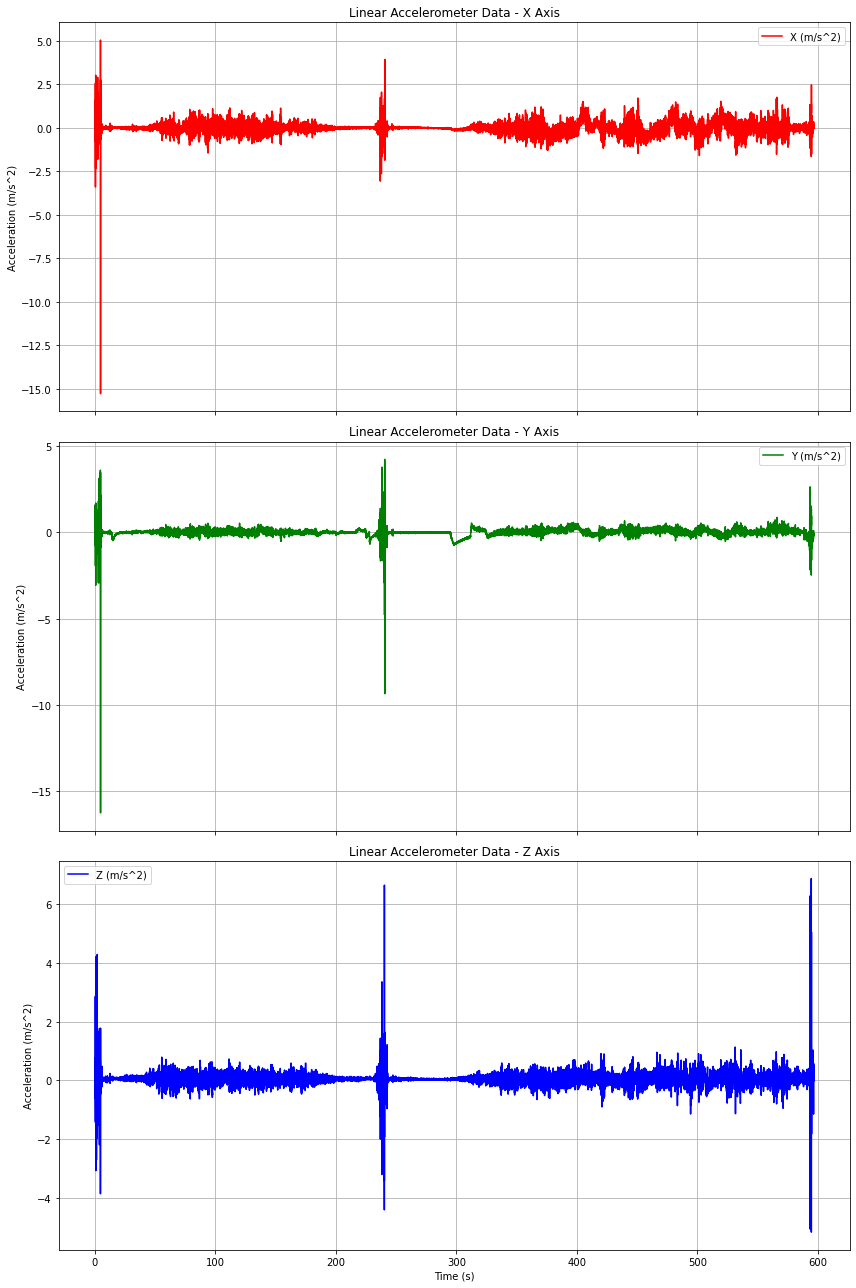

In [27]:
fig, axs = plt.subplots(3, 1, figsize=(12, 18), sharex=True)

# Plot X-axis data
axs[0].plot(data['Time (s)'], data['X (m/s^2)'], label='X (m/s^2)', color='r')
axs[0].set_title('Linear Accelerometer Data - X Axis')
axs[0].set_ylabel('Acceleration (m/s^2)')
axs[0].legend()
axs[0].grid(True)

# Plot Y-axis data
axs[1].plot(data['Time (s)'], data['Y (m/s^2)'], label='Y (m/s^2)', color='g')
axs[1].set_title('Linear Accelerometer Data - Y Axis')
axs[1].set_ylabel('Acceleration (m/s^2)')
axs[1].legend()
axs[1].grid(True)

# Plot Z-axis data
axs[2].plot(data['Time (s)'], data['Z (m/s^2)'], label='Z (m/s^2)', color='b')
axs[2].set_title('Linear Accelerometer Data - Z Axis')
axs[2].set_xlabel('Time (s)')
axs[2].set_ylabel('Acceleration (m/s^2)')
axs[2].legend()
axs[2].grid(True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [28]:
# Define the time range to exclude
start_time = data['Time (s)'].iloc[0] + 15
end_time = data['Time (s)'].iloc[-1] - 15

# Filter the data to exclude the first and last 10 seconds
filtered_data = data[(data['Time (s)'] >= start_time) & (data['Time (s)'] <= end_time)]


In [22]:
# Function to apply Kalman filter
def apply_kalman_filter(data, process_var=1e-5, measurement_var=1e-1):
    kf = KalmanFilter(dim_x=2, dim_z=1)
    kf.x = np.array([0., 0.])  # initial state (location and velocity)
    kf.F = np.array([[1., 1.],
                     [0., 1.]])  # state transition matrix
    kf.H = np.array([[1., 0.]])  # measurement function
    kf.P *= 1000.  # covariance matrix
    kf.R = measurement_var  # measurement uncertainty
    kf.Q = np.array([[process_var, 0.],
                     [0., process_var]])  # process uncertainty

    filtered_data = []
    for measurement in data:
        kf.predict()
        kf.update(measurement)
        filtered_data.append(kf.x[0])
    return filtered_data

# Apply Kalman filter to each axis
filtered_data['X (m/s^2)'] = apply_kalman_filter(filtered_data['X (m/s^2)'])
filtered_data['Y (m/s^2)'] = apply_kalman_filter(filtered_data['Y (m/s^2)'])
filtered_data['Z (m/s^2)'] = apply_kalman_filter(filtered_data['Z (m/s^2)'])


<ipython-input-22-bee62483c3e9>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['X (m/s^2)'] = apply_kalman_filter(filtered_data['X (m/s^2)'])
<ipython-input-22-bee62483c3e9>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Y (m/s^2)'] = apply_kalman_filter(filtered_data['Y (m/s^2)'])
<ipython-input-22-bee62483c3e9>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

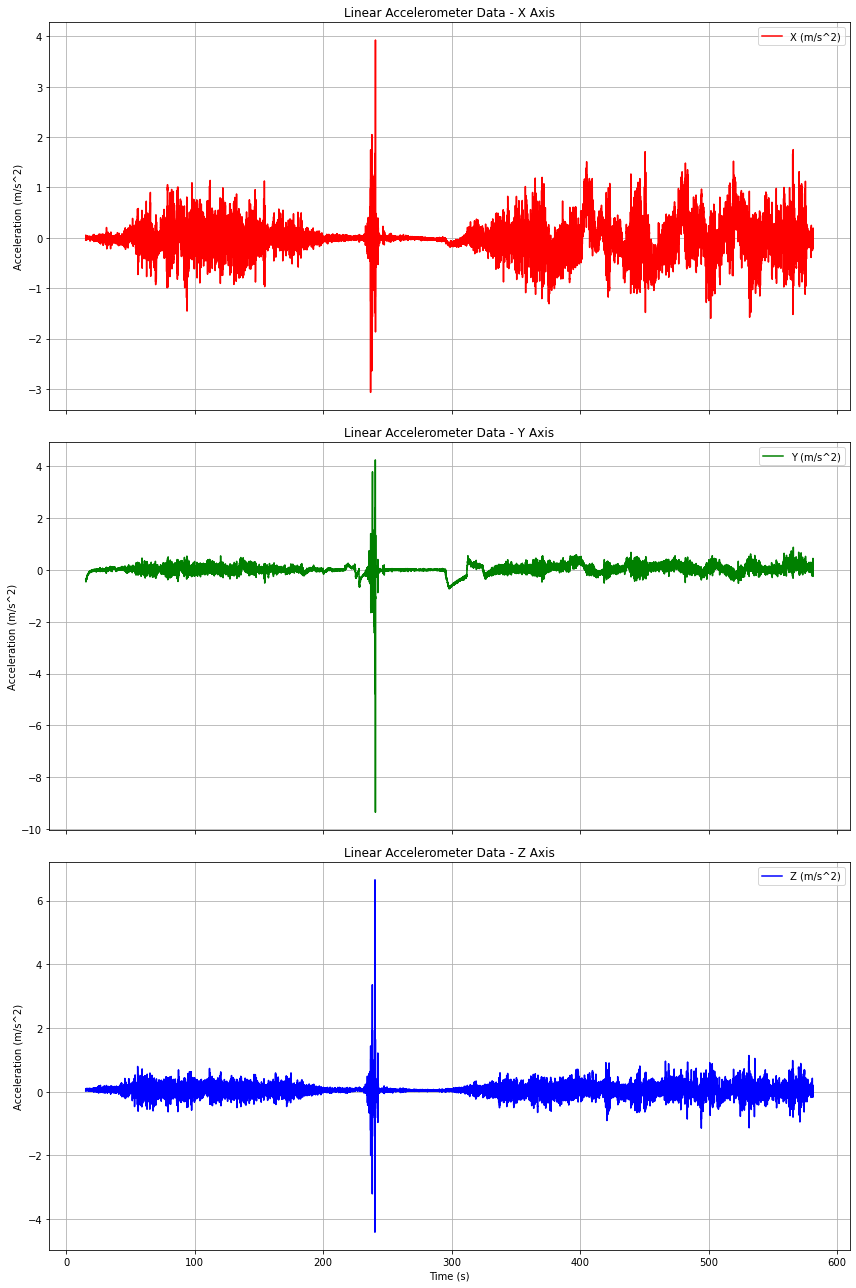

In [29]:
fig, axs = plt.subplots(3, 1, figsize=(12, 18), sharex=True)

# Plot X-axis data
axs[0].plot(filtered_data['Time (s)'], filtered_data['X (m/s^2)'], label='X (m/s^2)', color='r')
axs[0].set_title('Linear Accelerometer Data - X Axis')
axs[0].set_ylabel('Acceleration (m/s^2)')
axs[0].legend()
axs[0].grid(True)

# Plot Y-axis data
axs[1].plot(filtered_data['Time (s)'], filtered_data['Y (m/s^2)'], label='Y (m/s^2)', color='g')
axs[1].set_title('Linear Accelerometer Data - Y Axis')
axs[1].set_ylabel('Acceleration (m/s^2)')
axs[1].legend()
axs[1].grid(True)

# Plot Z-axis data
axs[2].plot(filtered_data['Time (s)'], filtered_data['Z (m/s^2)'], label='Z (m/s^2)', color='b')
axs[2].set_title('Linear Accelerometer Data - Z Axis')
axs[2].set_xlabel('Time (s)')
axs[2].set_ylabel('Acceleration (m/s^2)')
axs[2].legend()
axs[2].grid(True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()